# Notebook created by Muhammad Mursaleen 
## Dated: 1st November 2023 
> # EDA_Day1 

[ GitHub repo ](https://github.com/Mursaleen793/EDA_Day1.git)


In [1]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
#importing dataset 
df=sns.load_dataset('titanic')


In [3]:
#step1 : data composition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [7]:
#counting the unique values in each column
df.survived.unique()

array([0, 1], dtype=int64)

In [8]:
#to count values
df.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [9]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [10]:
df["pclass"].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [11]:
df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [12]:
df["who"].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [13]:
df["survived"].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [14]:
df["adult_male"].value_counts()

adult_male
True     537
False    354
Name: count, dtype: int64

In [15]:
df["age" ].value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [16]:
max(df["age"])  

80.0

In [17]:
#based on the age making new column 
#create bin edges 
bin_edges=[0,5,10,15,18,40,80]
labels=['0-5','6-10','11-15','16-18','18-40','41-80']
#adding new column agegroup
df["age_group"]=pd.cut(df["age"],bin_edges,labels=labels)
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,18-40
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,18-40
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,18-40
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,18-40
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,18-40


In [18]:
df["age_group"].value_counts()

age_group
18-40    425
41-80    150
16-18     56
0-5       44
6-10      20
11-15     19
Name: count, dtype: int64

In [19]:
#pivot table 
df.groupby("who")[['survived','alone']].value_counts().unstack()

alone           False  True 
who   survived              
child 0            32      2
      1            45      4
man   0           103    346
      1            24     64
woman 0            40     26
      1           110     95

In [20]:
#maximum and minimum age where who is child 
df[df["who"]=="child"]["age"].max()


15.0

# Notebook Created  by Muhammad Mursaleen
# Dated : 2nd November 2023
> # EDA_Day2


In [21]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'age_group'],
      dtype='object')

<Axes: xlabel='age', ylabel='fare'>

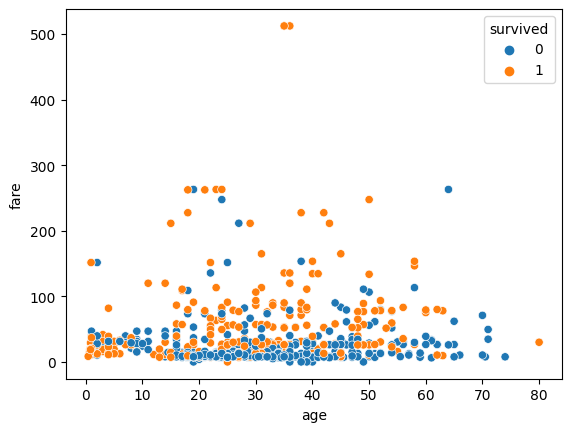

In [22]:
#Data visulaization
sns.scatterplot(data=df,x='age',y='fare',hue="survived")

<Axes: xlabel='who', ylabel='fare'>

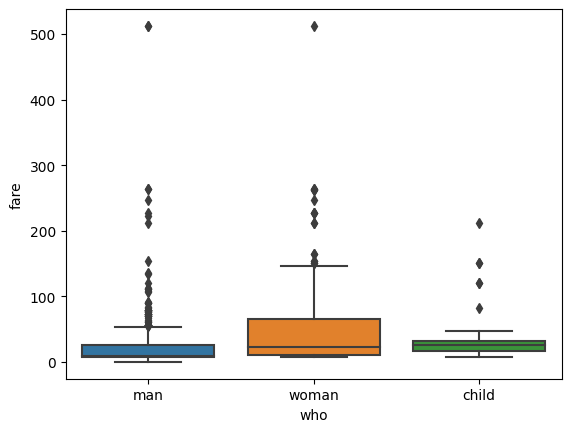

In [23]:
#boxplot
sns.boxplot(data=df,x='who',y='fare')

In [24]:
import plotly.express as px

In [30]:
fig=px.scatter(df,x='age',y='fare',color='who')
fig.show()

In [33]:
fig =px.box(df,x='survived',y='fare',color='who')
fig.show()  

<Axes: xlabel='age_group', ylabel='count'>

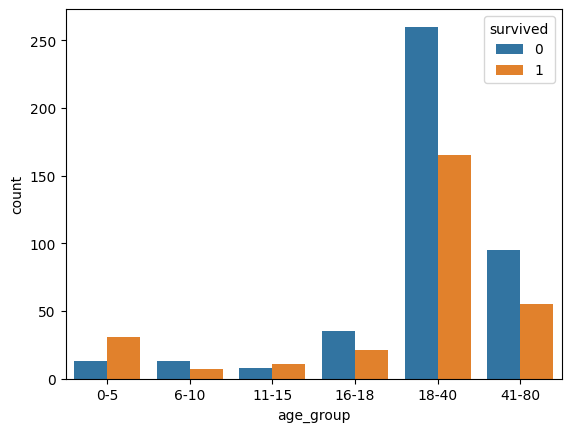

In [34]:
sns.countplot(df,x="age_group",hue="survived")

<Axes: xlabel='fare', ylabel='Count'>

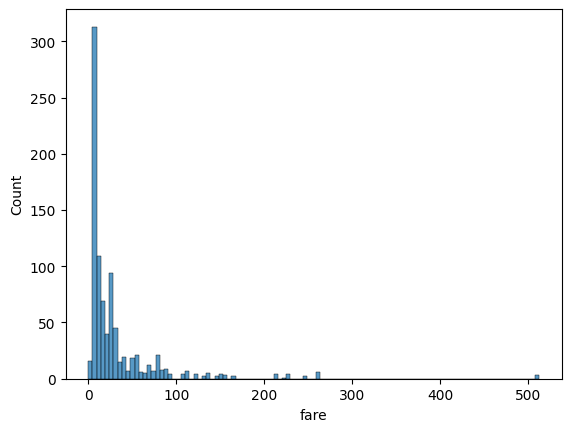

In [36]:
#distribution plot
sns.histplot(df,x="fare")

<Axes: xlabel='age', ylabel='Count'>

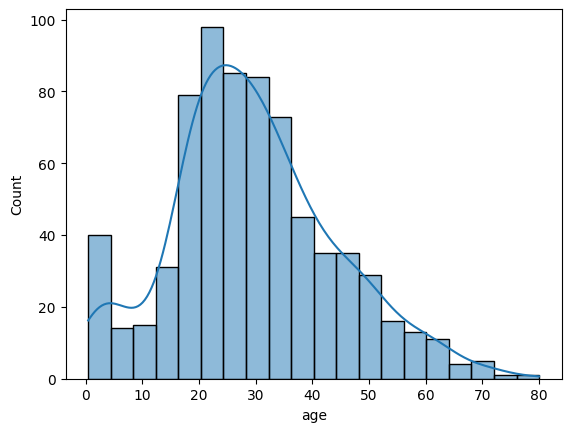

In [38]:
sns.histplot(df,x="age",kde=True)

In [45]:
#shapiro wilk test 
from scipy.stats import shapiro
#handling missing values    
age_data=df["age"].dropna()
stat,p=shapiro(age_data)
print("statitic",stat)
print("p value",p)
#interpretation
alpha=0.05
if p>alpha:
    print("sample looks gaussian")
else:
    print("sample does not look gaussian")


statitic 0.981458306312561
p value 7.340329943872348e-08
sample does not look gaussian
